In [6]:
# Importer les bibliothèques nécessaires
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error
import pandas as pd
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import numpy as np
from mlxtend.feature_selection import SequentialFeatureSelector

In [7]:
# file csv to panda

nom_du_fichier_csv = '/Users/marche/Documents/Centrale 3A/Apprentissage_Automatique_Project/Python_files/csv_files/retard_train_bdd_clean.csv'

data = pd.read_csv(nom_du_fichier_csv)

In [8]:
#choose here the label you want to train for among the following list;["prct_cause_infra","prct_cause_gestion_trafic","prct_cause_materiel_roulant","prct_cause_prise_en_charge_voyageurs","prct_cause_externe","prct_cause_gestion_gare"]:

label = "prct_cause_infra"


data_prct = (
    data.copy()
        .drop(
            ["prct_cause_infra","prct_cause_gestion_trafic","prct_cause_materiel_roulant","prct_cause_prise_en_charge_voyageurs","prct_cause_externe","prct_cause_gestion_gare"],
            axis=1,
        )
    )

y = data[label]
X = data_prct

# Diviser le jeu de données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Créer la pipeline pour la régression linéaire
linear_regression_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Vous pouvez omettre cette étape si elle n'est pas nécessaire
    ('linear_regression', LinearRegression())  # Régression linéaire
])

In [10]:
# Créer la pipeline pour la régression Random Forest
random_forest_regression_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('random_forest', RandomForestRegressor(n_estimators=100, random_state=42))
])


In [11]:
# Créer la pipeline pour la Support Vector Regression (SVR)
svr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR())
])


In [12]:
# Créer la pipeline pour les K-plus proches voisins (K-NN) en régression
knn_regression_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor(n_neighbors=5))  # K-plus proches voisins en régression avec 5 voisins
])

In [13]:
# Entraîner les modèles avec les différentes pipelines

linear_regression_pipeline.fit(X_train, y_train)
random_forest_regression_pipeline.fit(X_train, y_train)
svr_pipeline.fit(X_train, y_train)
knn_regression_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsRegressor())])

In [14]:
# Évaluer la performance des modèles de régression
linear_regression_predictions = linear_regression_pipeline.predict(X_test)
mse_linear_regression = mean_squared_error(y_test, linear_regression_predictions)
print(f"Erreur quadratique moyenne (MSE) de la régression linéaire : {mse_linear_regression:.2f}")

random_forest_mse = mean_squared_error(y_test, random_forest_regression_pipeline.predict(X_test))
print(f"Erreur quadratique moyenne (MSE) du modèle Random Forest en régression : {random_forest_mse:.2f}")

svr_mse = mean_squared_error(y_test, svr_pipeline.predict(X_test))
print(f"Erreur quadratique moyenne (MSE) du modèle SVR : {svr_mse:.2f}")

knn_mse = mean_squared_error(y_test, knn_regression_pipeline.predict(X_test))
print(f"Erreur quadratique moyenne (MSE) du modèle K-plus proches voisins en régression : {knn_mse:.2f}")

Erreur quadratique moyenne (MSE) de la régression linéaire : 214.31
Erreur quadratique moyenne (MSE) du modèle Random Forest en régression : 179.21
Erreur quadratique moyenne (MSE) du modèle SVR : 235.50
Erreur quadratique moyenne (MSE) du modèle K-plus proches voisins en régression : 241.69


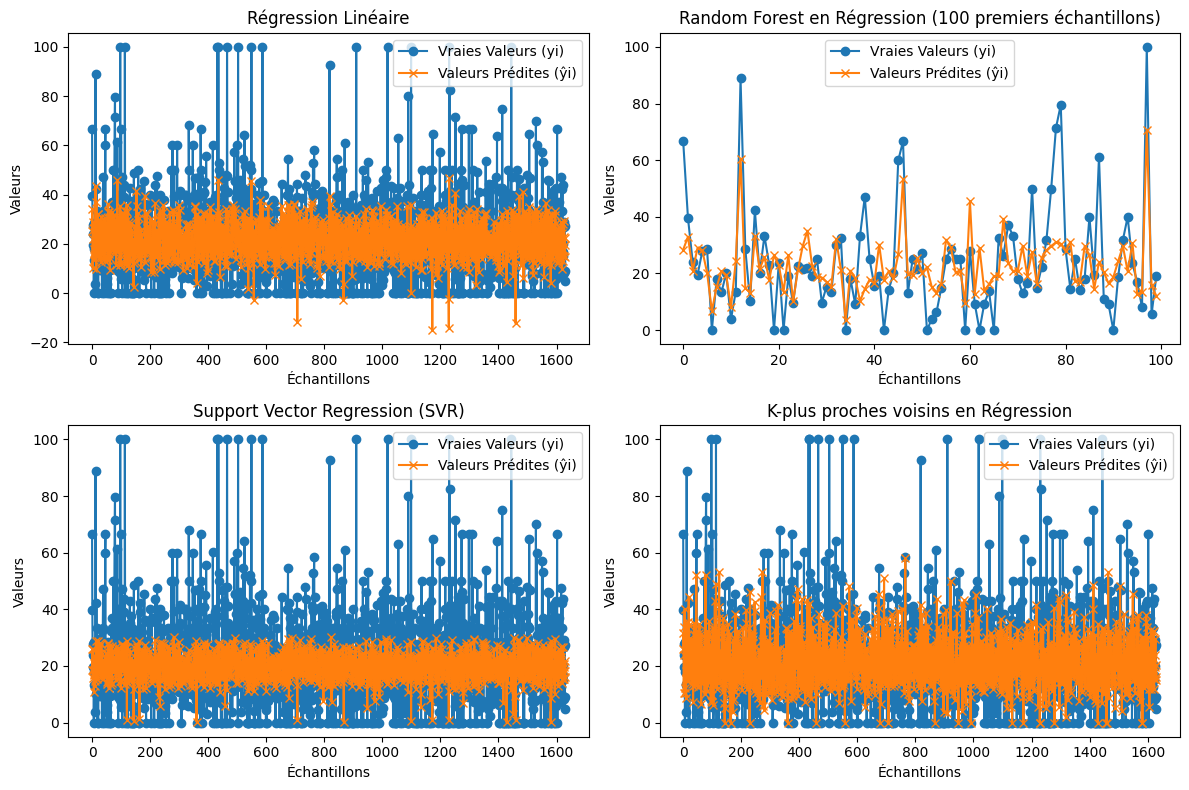

In [22]:
# Prédire les valeurs pour chaque modèle
linear_regression_predictions = linear_regression_pipeline.predict(X_test)
random_forest_predictions = random_forest_regression_pipeline.predict(X_test)
svr_predictions = svr_pipeline.predict(X_test)
knn_predictions = knn_regression_pipeline.predict(X_test)

# Tracer les courbes yi vs ŷi pour chaque modèle
plt.figure(figsize=(12, 8))

# Modèle de régression linéaire
plt.subplot(221)
plt.plot(np.arange(len(y_test)), y_test, label="Vraies Valeurs (yi)", marker='o')
plt.plot(np.arange(len(y_test)), linear_regression_predictions, label="Valeurs Prédites (ŷi)", marker='x')
plt.xlabel("Échantillons")
plt.ylabel("Valeurs")
plt.title("Régression Linéaire")
plt.legend()

# Modèle Random Forest en régression
#plt.subplot(222)
#plt.plot(np.arange(len(y_test)), y_test, label="Vraies Valeurs (yi)", marker='o')
#plt.plot(np.arange(len(y_test)), random_forest_predictions, label="Valeurs Prédites (ŷi)", marker='x')
#plt.xlabel("Échantillons")
#plt.ylabel("Valeurs")
#plt.title("Random Forest en Régression")
#plt.legend()

# Modèle Random Forest en régression
plt.subplot(222)
plt.plot(np.arange(100), y_test[:100], label="Vraies Valeurs (yi)", marker='o')
plt.plot(np.arange(100), random_forest_predictions[:100], label="Valeurs Prédites (ŷi)", marker='x')
plt.xlabel("Échantillons")
plt.ylabel("Valeurs")
plt.title("Random Forest en Régression (100 premiers échantillons)")
plt.legend()

# Modèle SVR
plt.subplot(223)
plt.plot(np.arange(len(y_test)), y_test, label="Vraies Valeurs (yi)", marker='o')
plt.plot(np.arange(len(y_test)), svr_predictions, label="Valeurs Prédites (ŷi)", marker='x')
plt.xlabel("Échantillons")
plt.ylabel("Valeurs")
plt.title("Support Vector Regression (SVR)")
plt.legend()

# Modèle K-plus proches voisins en régression
plt.subplot(224)
plt.plot(np.arange(len(y_test)), y_test, label="Vraies Valeurs (yi)", marker='o')
plt.plot(np.arange(len(y_test)), knn_predictions, label="Valeurs Prédites (ŷi)", marker='x')
plt.xlabel("Échantillons")
plt.ylabel("Valeurs")
plt.title("K-plus proches voisins en Régression")
plt.legend()

plt.tight_layout()
plt.show()

In [16]:
# Create SequentialFeatureSelector for Random Forest
sfs = SequentialFeatureSelector(random_forest_regression_pipeline.named_steps['random_forest'],
                                k_features='best',  # Set the number of features you want to select
                                forward=True,
                                floating=False,
                                verbose=2,
                                scoring='neg_mean_squared_error',  # Use negative MSE for feature selection
                                cv=None)

# Perform feature selection
sfs.fit(X_train, y_train)

# Get the selected feature indices
selected_feature_indices = sfs.k_feature_idx_

# Transform the training and test data with the selected features
X_train_selected = X_train[:, selected_feature_indices]
X_test_selected = X_test[:, selected_feature_indices]

# Train the Random Forest model on the data with selected features
random_forest_regression_pipeline.fit(X_train_selected, y_train)

# Make predictions
y_pred = random_forest_regression_pipeline.predict(X_test_selected)

# Evaluate the performance with MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE) on selected features: {mse:.2f}")



#pb: this is way to long. (134 x 135)/2 iterations = 9045 iterations

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 134 out of 134 | elapsed:   25.7s finished

[2023-10-19 10:56:00] Features: 1/134 -- score: -48.60314984559529[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 133 out of 133 | elapsed:  2.8min finished

[2023-10-19 10:58:50] Features: 2/134 -- score: -37.856406647839314[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s

STOPPING EARLY DUE TO KEYBOARD INTERRUPT...

TypeError: '(slice(None, None, None), None)' is an invalid key

Variance expliquée par chaque composante principale :
[0.03875162 0.02455915 0.01742234 0.01623613 0.01570105 0.01538872
 0.01514139 0.01477706 0.01426694 0.01361114 0.01280584 0.01259749
 0.0124993  0.01189969 0.01176626 0.01151094 0.01102092 0.01070588
 0.01002493 0.00946756 0.00900604 0.00850414 0.00844399 0.0083098
 0.00805524 0.00799119 0.00768566 0.00762267 0.00761878 0.00760354
 0.00758599 0.0075677  0.00755073 0.00754127 0.00752598 0.00752408
 0.00752358 0.00752358 0.00752358 0.00752358 0.00752358 0.00752358
 0.00752358 0.00752358 0.00752358 0.00752358 0.00752358 0.00752358
 0.00752358 0.00752358 0.00752358 0.00752358 0.00752358 0.00752358
 0.00752358 0.00752358 0.00752358 0.00752358 0.00752358 0.00752358
 0.00752358 0.00752358 0.00752358 0.00752358 0.00752358 0.00752358
 0.00752358 0.00752358 0.00752358 0.00752358 0.00752358 0.00752358
 0.00752358 0.00752358 0.00752358 0.00752358 0.00752358 0.00752358
 0.00752358 0.00752358 0.00752358 0.00752358 0.00752358 0.00752358
 0.007523

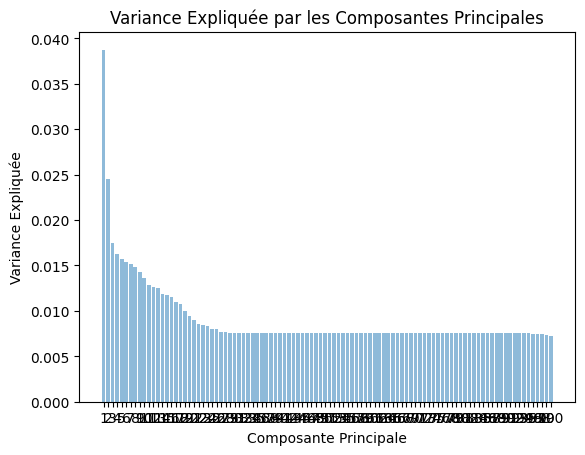

In [27]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt



# mise à l'échelle
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=100)

# Ajustez et transformez les données
X_pca = pca.fit_transform(X_scaled)

# Les données ont maintenant été réduites en 2 composantes principales (ou le nombre que vous avez spécifié)

# composantes principales et variance expliquée
explained_variance = pca.explained_variance_ratio_
print("Variance expliquée par chaque composante principale :")
print(explained_variance)


principal_components = pca.components_
print("Composantes principales :")
print(principal_components)




# graphique à barres pour afficher les variances expliquées
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center')
plt.xlabel('Composante Principale')
plt.ylabel('Variance Expliquée')
plt.title('Variance Expliquée par les Composantes Principales')
plt.xticks(range(1, len(explained_variance) + 1))
plt.show()

In [29]:
correlation_matrix = X.corrwith(y)

pd.set_option('display.max_rows', None)
# Afficher la matrice de corrélation
abs_mat = correlation_matrix.abs()

sorted_correlation = abs_mat.sort_values(ascending=False)

print(sorted_correlation)


ARRIVEE_PARIS MONTPARNASSE                0.187164
national_service                          0.109501
annee                                     0.101507
DEPART_PARIS EST                          0.089236
DEPART_MARSEILLE ST CHARLES               0.081075
ARRIVEE_MADRID                            0.076220
ARRIVEE_STUTTGART                         0.067749
retard_moyen_arrivee                      0.067615
ARRIVEE_PARIS NORD                        0.063833
DEPART_LE MANS                            0.063623
DEPART_POITIERS                           0.060101
ARRIVEE_TOURCOING                         0.059020
DEPART_STUTTGART                          0.057998
ARRIVEE_MARSEILLE ST CHARLES              0.056205
nb_train_depart_retard                    0.055680
DEPART_ANGERS SAINT LAUD                  0.055111
mois                                      0.054778
DEPART_TOULOUSE MATABIAU                  0.054604
ARRIVEE_PARIS EST                         0.053793
ARRIVEE_TOULOUSE MATABIAU      

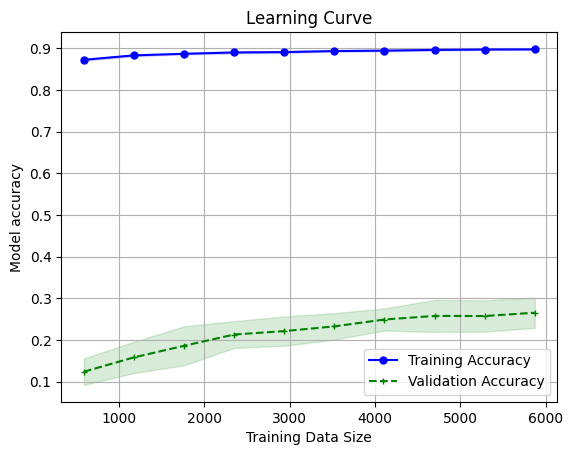

In [31]:
from sklearn.model_selection import learning_curve

# Use learning curve to get training and test scores along with train sizes
#
train_sizes, train_scores, test_scores = learning_curve(estimator=random_forest_regression_pipeline, X=X_train, y=y_train,
                                                       cv=10, train_sizes=np.linspace(0.1, 1.0, 10),
                                                     n_jobs=1)
#
# Calculate training and test mean and std
#
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
#
# Plot the learning curve
#
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()

In [34]:
from sklearn.model_selection import GridSearchCV



# Définissez une grille d'hyperparamètres que vous souhaitez tester
param_grid = {
    'random_forest__n_estimators': [10, 50, 100],
    'random_forest__max_depth': [None, 10, 20, 30],
    'random_forest__min_samples_split': [2, 5, 10],
    'random_forest__min_samples_leaf': [1, 2, 4]
}


model = random_forest_regression_pipeline
# Créez l'objet GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Effectuez la recherche sur grille en ajustant le modèle aux données
grid_search.fit(X, y)

# Obtenez les meilleurs hyperparamètres et la meilleure précision
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

# Imprimez les résultats
print("Meilleurs hyperparamètres:", best_params)
print("Meilleure précision:", best_accuracy)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type